In [1]:
from engine.vector_backtest_engine import VectorBacktestEngine
from factor_manager.factor_miner.trend_following import TrendFollowing
from factor_manager.factor_miner.rsi import RSI
from factor_manager.factor_miner.kdj import KDJ
from portfolio_manager.portfolio_template import get_portfolio_pnl
import argparse

In [2]:
def get_args_with_batch_id(batch_id: int) -> argparse.Namespace:
    """
    Get command line arguments with default values based on the provided batch_id.

    Parameters:
        batch_id (int): Identifier for selecting a specific set of default arguments.

    Returns:
        argparse.Namespace: Parsed command line arguments.
    """
    
    parser = argparse.ArgumentParser()
    parser.add_argument("--factor_name", "-m", type=str, default="TrendFollowing", help="TrendFollowing factor")
    parser.add_argument("--model_type", type=str, default="rule_based", help="Model type")
    parser.add_argument("--model_name", type=str, default="vote", help="Model name")
    parser.add_argument("--back_window", type=int, default=3000, help="Number of trading days for train data")
    parser.add_argument("--target_type", type=str, default="tag_raw", help="tag_raw or tag_ranked in model prediction")
    parser.add_argument("--with_pca", type=bool, default=False, help="PCA in model training")
    parser.add_argument("--trade_type", type=str, default='long_only', help="Long only or long short in signal evaluation")
    parser.add_argument("--upper_bound", type=float, default=0, help="Upper bound of signal to weight")
    parser.add_argument("--lower_bound", type=float, default=0, help="Lower bound of signal to weight")
    parser.add_argument("--model_id", type=str, default="vote", help="Model id created from Model name")
    args = parser.parse_args()

    if batch_id == 1:
        args.model_type = 'rule_based'
        args.model_name = 'vote'
        args.target_type = 'tag_raw'   
        args.with_pca = False
        args.model_id = 'vote'
    
    elif batch_id == 2:
        args.model_type = 'prediction_based'
        args.model_name = 'OLSLRModel'
        args.target_type = 'tag_raw'   
        args.with_pca = False
        args.model_id = 'OLSLRModel'
    
    elif batch_id == 3:
        args.model_type = 'prediction_based'
        args.model_name = 'LogisticModel'
        args.target_type = 'tag_class'   
        args.with_pca = False
        args.model_id = 'LogisticModel_tag_class'

    elif batch_id == 4:
        args.model_type = 'prediction_based'
        args.model_name = 'LogisticModel'
        args.target_type = 'tag_multi_class'   
        args.with_pca = False
        args.model_id = 'LogisticModel_tag_multi_class'

    elif batch_id == 5:
        args.model_type = 'prediction_based'
        args.model_name = 'LogisticModel'
        args.target_type = 'tag_class'   
        args.with_pca = True
        args.model_id = 'LogisticModel_tag_class_PCA'

    elif batch_id == 6:
        args.model_type = 'prediction_based'
        args.model_name = 'LogisticModel'
        args.target_type = 'tag_multi_class'   
        args.with_pca = True
        args.model_id = 'LogisticModel_tag_multi_class_PCA'

    return args

高相关因子融合

2024-01-02 17:58:31.728 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet


2024-01-02 17:58:31.730 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8899        1.4004        0.9898       1.5059
vol           8064653.0    14468180.0    16991334.0    13729419.0   10780427.0
amount      5742758.967  10706463.941  1241699

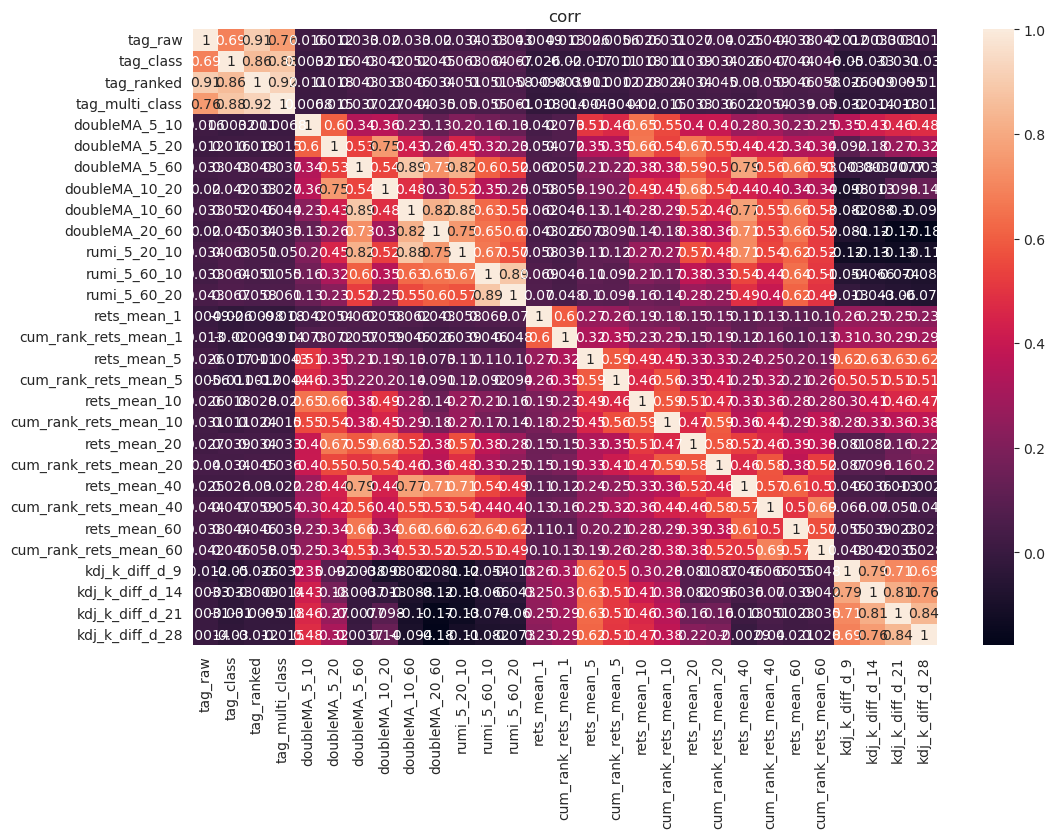

2024-01-02 17:59:35.240 | INFO     | engine.vector_backtest_engine:vector_backtest:83 -                                000016.SH_benchmark  \
annualized return                         0.075339   
sharpe ratio                              0.291962   
win ratio                                 0.502988   
win per loss                              1.042277   
annualized turnover(buy side)                  NaN   
annualized costs                               NaN   

                               000016.SH_LogisticModel_tag_class  \
annualized return                                       0.069900   
sharpe ratio                                            0.498348   
win ratio                                               0.524402   
win per loss                                            1.021127   
annualized turnover(buy side)                          30.854369   
annualized costs                                        0.014193   

                               000016.SH_LogisticModel_t

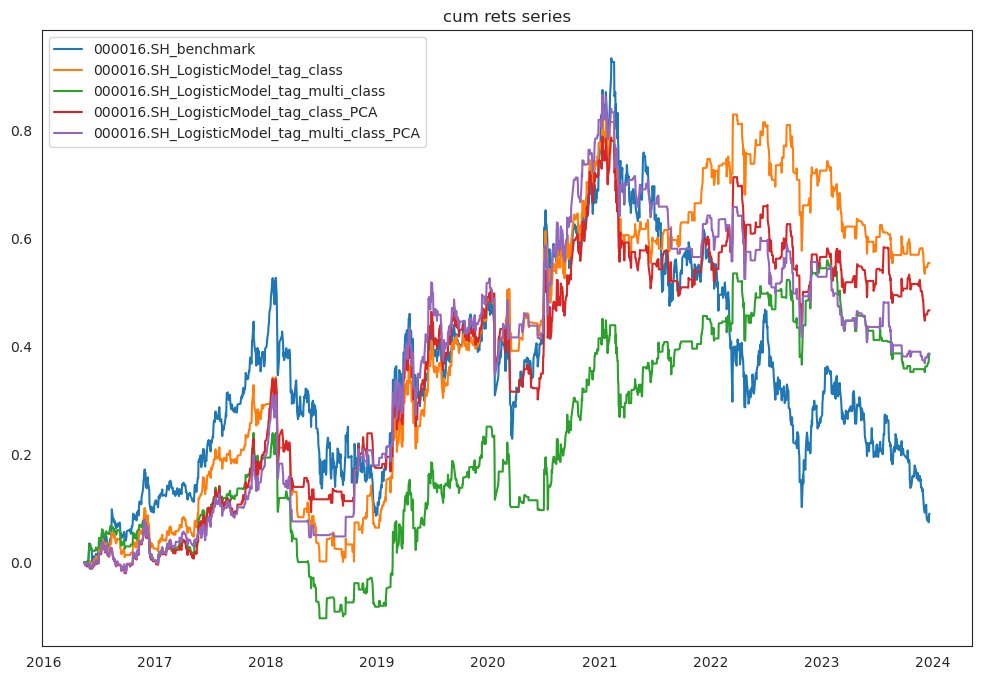

2024-01-02 17:59:35.784 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2024-01-02 17:59:35.787 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

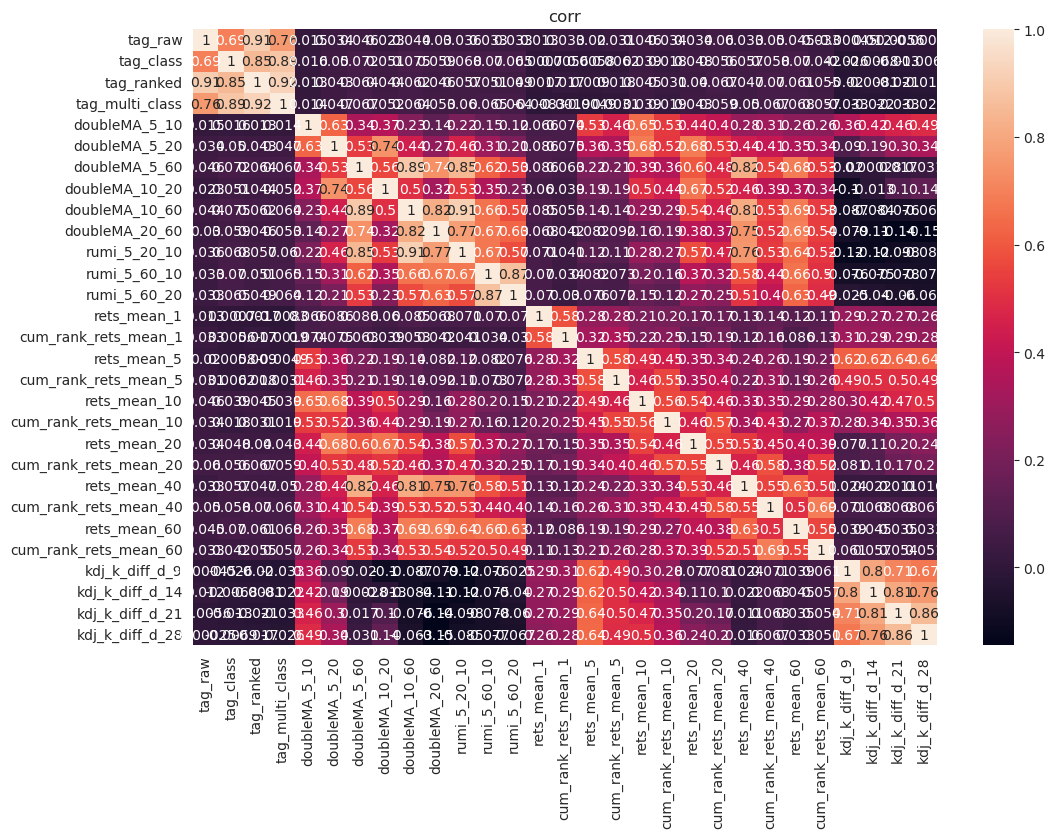

2024-01-02 18:00:31.449 | INFO     | engine.vector_backtest_engine:vector_backtest:83 -                                000300.SH_benchmark  \
annualized return                         0.100325   
sharpe ratio                              0.388583   
win ratio                                 0.525380   
win per loss                              0.969576   
annualized turnover(buy side)                  NaN   
annualized costs                               NaN   

                               000300.SH_LogisticModel_tag_class  \
annualized return                                       0.048818   
sharpe ratio                                            0.312846   
win ratio                                               0.526116   
win per loss                                            0.964388   
annualized turnover(buy side)                          25.497207   
annualized costs                                        0.011729   

                               000300.SH_LogisticModel_t

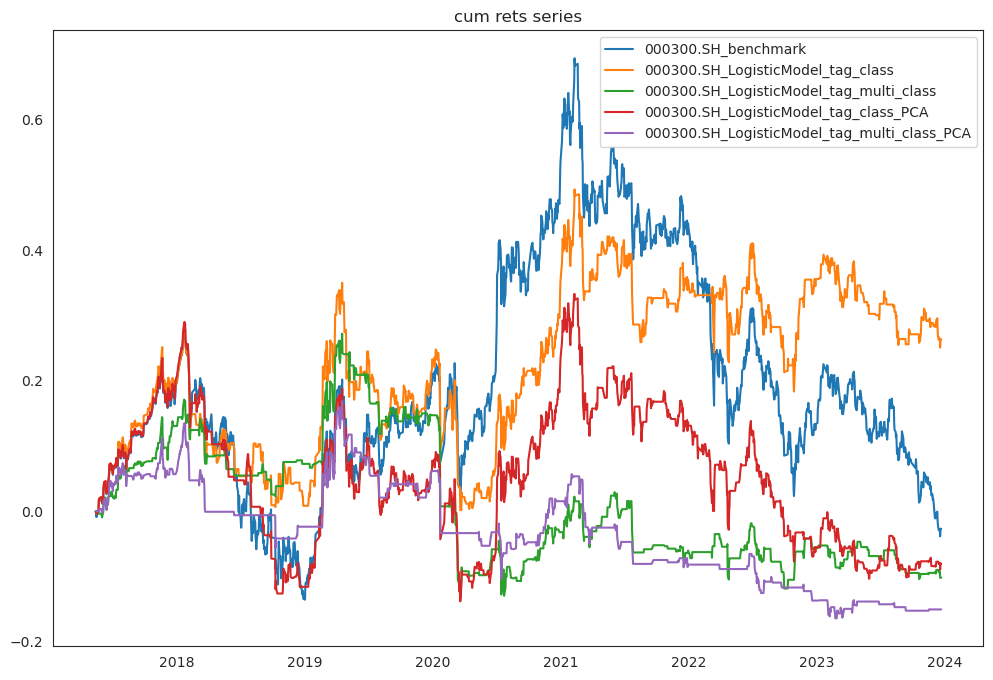

2024-01-02 18:00:31.938 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2024-01-02 18:00:31.940 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

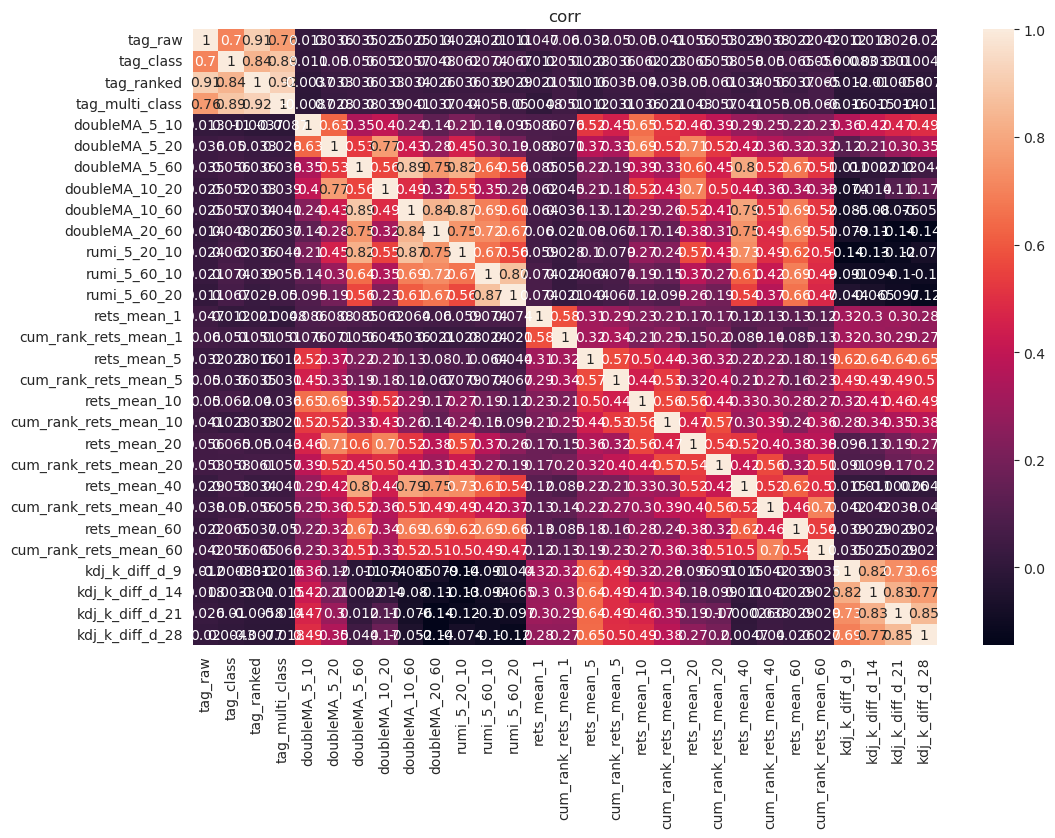

2024-01-02 18:01:27.914 | INFO     | engine.vector_backtest_engine:vector_backtest:83 -                                000905.SH_benchmark  \
annualized return                         0.135136   
sharpe ratio                              0.462162   
win ratio                                 0.553796   
win per loss                              0.875335   
annualized turnover(buy side)                  NaN   
annualized costs                               NaN   

                               000905.SH_LogisticModel_tag_class  \
annualized return                                      -0.037181   
sharpe ratio                                           -0.210339   
win ratio                                               0.522250   
win per loss                                            0.876290   
annualized turnover(buy side)                          30.346369   
annualized costs                                        0.013959   

                               000905.SH_LogisticModel_t

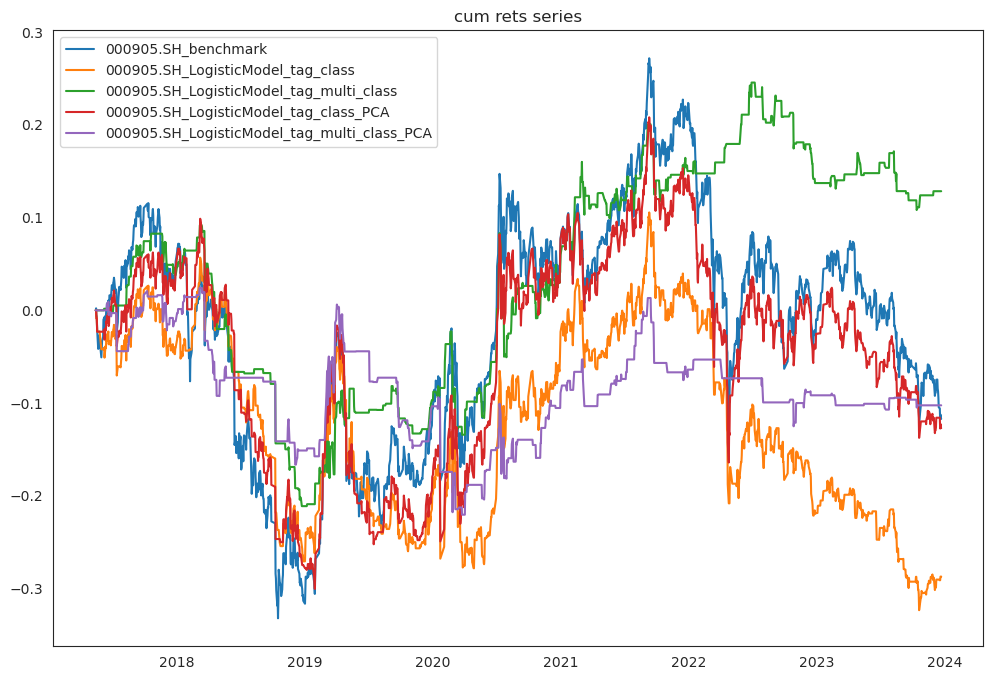

2024-01-02 18:01:28.266 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2024-01-02 18:01:28.267 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

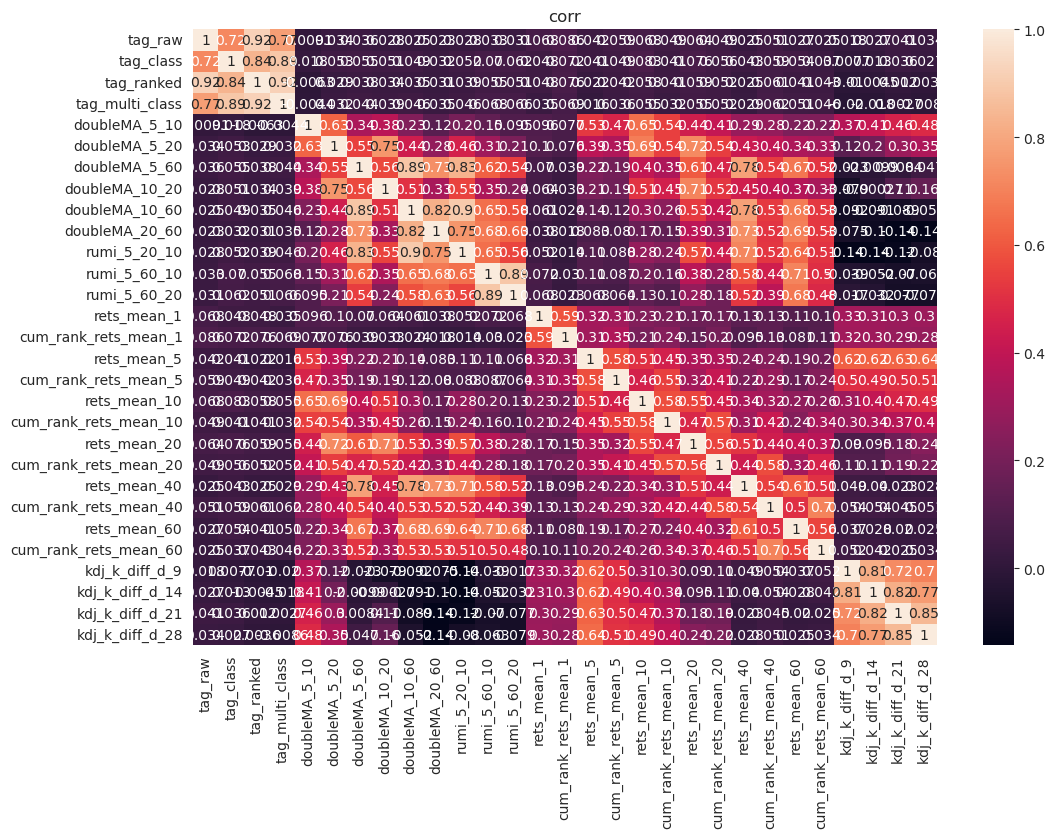

2024-01-02 18:02:20.364 | INFO     | engine.vector_backtest_engine:vector_backtest:83 -                                000852.SH_benchmark  \
annualized return                         0.142447   
sharpe ratio                              0.469628   
win ratio                                 0.560304   
win per loss                              0.852614   
annualized turnover(buy side)                  NaN   
annualized costs                               NaN   

                               000852.SH_LogisticModel_tag_class  \
annualized return                                       0.025567   
sharpe ratio                                            0.138746   
win ratio                                               0.541054   
win per loss                                            0.872751   
annualized turnover(buy side)                          34.726257   
annualized costs                                        0.015974   

                               000852.SH_LogisticModel_t

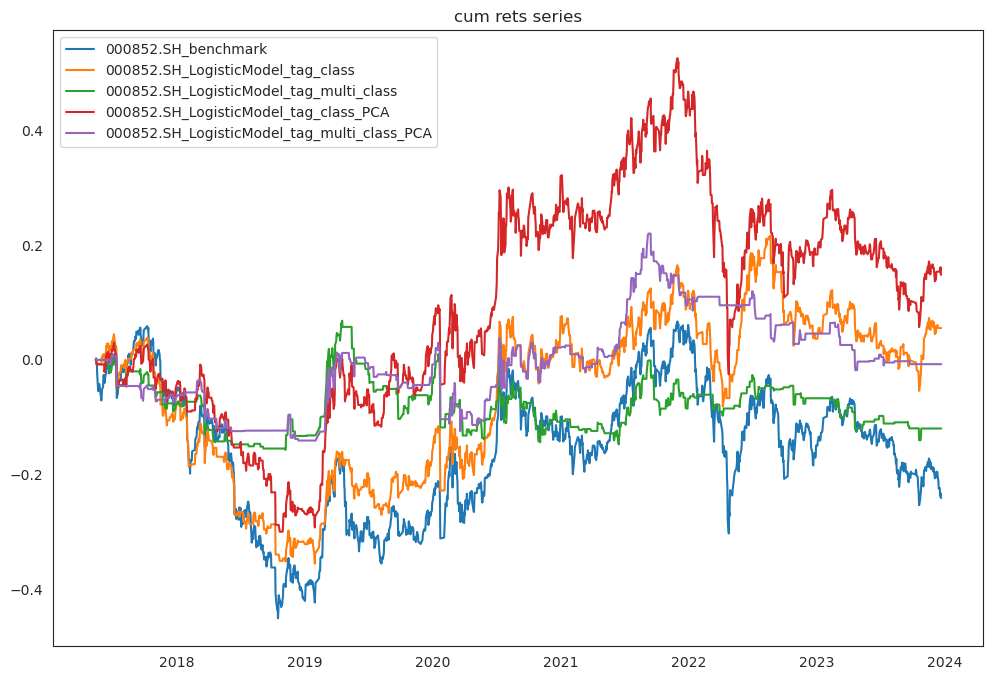

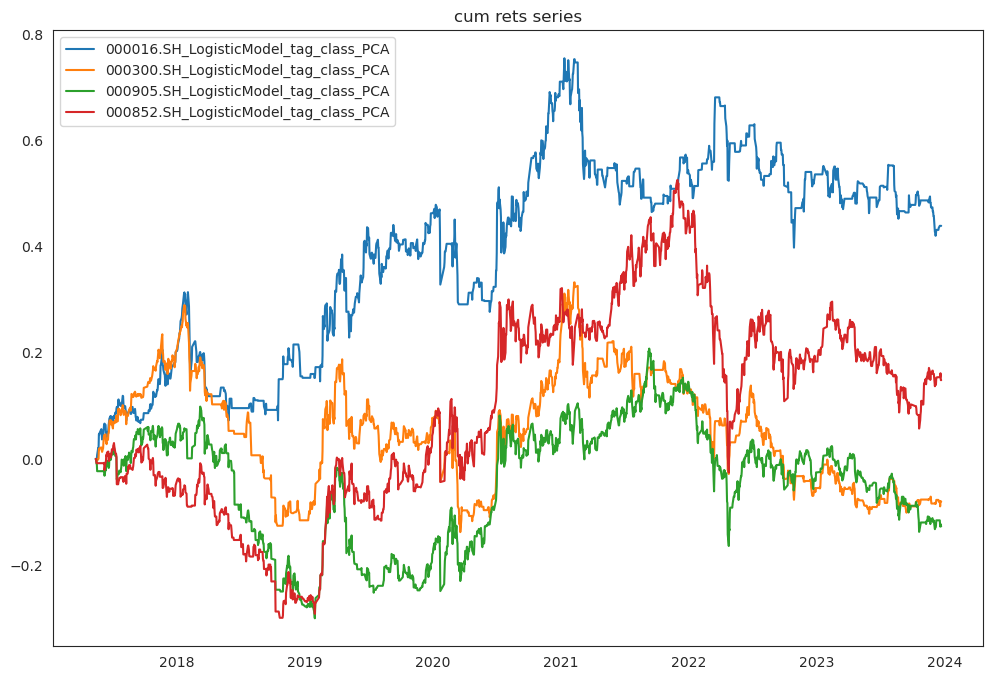

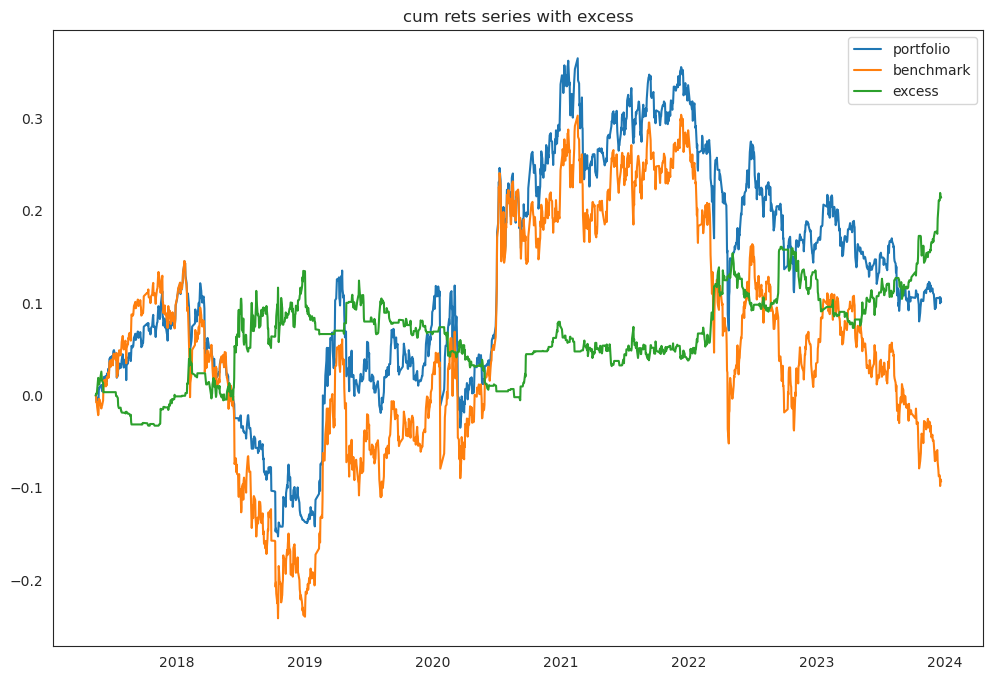

In [3]:
factor_classes = [TrendFollowing]
myvbe = VectorBacktestEngine(factor_classes)

contracts = ['000016.SH', '000300.SH', '000905.SH', '000852.SH']
args_list = [get_args_with_batch_id(batch_id) for batch_id in [3, 4, 5, 6]]

dict_signal, list_portfolio_rets = myvbe.vector_backtest(contracts, args_list)
get_portfolio_pnl(list_portfolio_rets, chosen_model_id='LogisticModel_tag_class_PCA')